In [ ]:
Assignment 2

In [ ]:
#1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

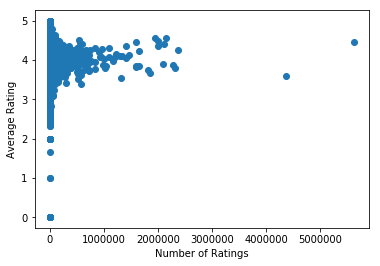

In [3]:
cols = pd.read_csv('books.csv', nrows=2).columns
books_data = pd.read_csv('books.csv', usecols=cols)
#convert values in columns to numeric type
books_data['average_rating'] = pd.to_numeric(books_data['average_rating'], errors='coerce')
books_data['ratings_count'] = pd.to_numeric(books_data['ratings_count'], errors='coerce')
books_data['text_reviews_count'] = pd.to_numeric(books_data['text_reviews_count'], errors='coerce')
books_data['# num_pages'] = pd.to_numeric(books_data['# num_pages'], errors='coerce')
#plot
plt.scatter(books_data['ratings_count'],books_data['average_rating'])
plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
#have to run this command below in Jupyter to get plotting to work
plt.show(block=False)

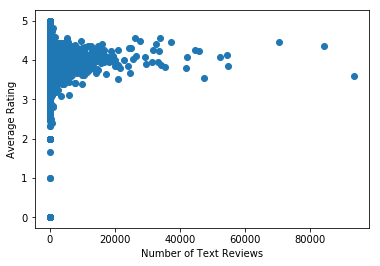

In [4]:
plt.scatter(books_data['text_reviews_count'],books_data['average_rating'])
plt.xlabel('Number of Text Reviews')
plt.ylabel('Average Rating')
plt.show(block=False)

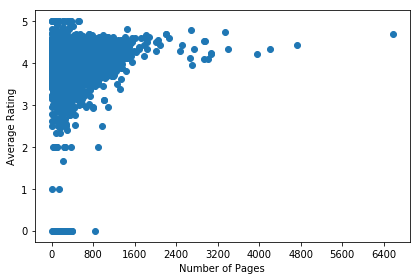

In [5]:
plt.scatter(books_data['# num_pages'],books_data['average_rating'])
plt.xlabel('Number of Pages')
plt.ylabel('Average Rating')
#alter number of ticks on x-axis
plt.xticks(np.arange(0, 7000, 200))
plt.tight_layout()
plt.locator_params(axis='x', nbins=10)
plt.show(block=False);

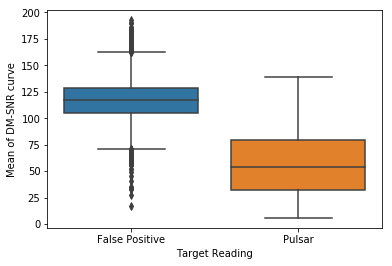

In [6]:
pulsar_data = pd.read_csv('pulsar_stars.csv', delimiter=',')

#function that changes value in target class from 0 to False Positive and 1 to Pulsar
def change_value(df):
    if df['target_class'] == 0:
        return "False Positive"
    elif df['target_class'] == 1:
        return "Pulsar"

pulsar_data['target_class']=pulsar_data.apply(change_value,axis=1)

sns.boxplot(y=' Mean of the integrated profile',x='target_class',data=pulsar_data)
plt.ylabel('Mean of DM-SNR curve')
plt.xlabel('Target Reading')
plt.show(block=False)

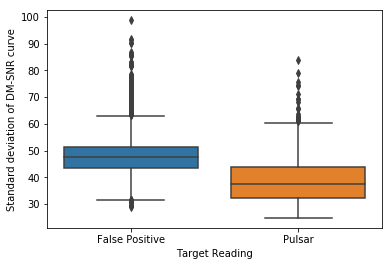

In [7]:
sns.boxplot(y=' Standard deviation of the integrated profile',x='target_class',data=pulsar_data)
plt.ylabel('Standard deviation of DM-SNR curve')
plt.xlabel('Target Reading')
plt.show(block=False)

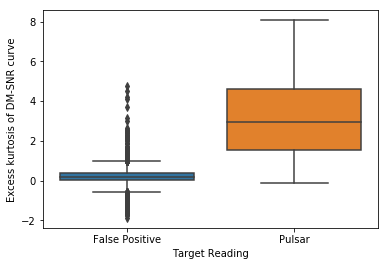

In [8]:
sns.boxplot(y=' Excess kurtosis of the integrated profile',x='target_class',data=pulsar_data)
plt.ylabel('Excess kurtosis of DM-SNR curve')
plt.xlabel('Target Reading')
plt.show(block=False)

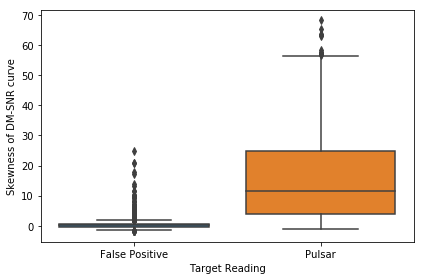

In [9]:
sns.boxplot(y=' Skewness of the integrated profile',x='target_class',data=pulsar_data)
plt.ylabel('Skewness of DM-SNR curve')
plt.xlabel('Target Reading')
plt.tight_layout()
plt.show(block=False)

In [31]:
#4)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sat, 14 Sep 2019   Prob (F-statistic):           5.08e-88
Time:                        12:21:16   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.0

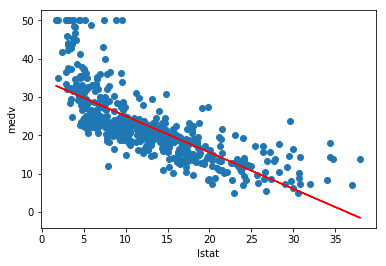

In [13]:
from sklearn import datasets, linear_model
import matplotlib
import statsmodels.api as sm

boston = pd.read_csv('Boston.csv')

Y = boston['medv']
X = boston['lstat']

#https://www.statsmodels.org/dev/generated/statsmodels.tools.tools.add_constant.html
#for function below
X2 = sm.add_constant(X)
#fit a linear regression model with medv~lstat using statsmodels
model = sm.OLS(Y,X2)
model_fit = model.fit()
print(model_fit.summary())

#convert X to array
X=np.array(X,dtype=pd.Series)
#https://www.geeksforgeeks.org/numpy-reshape-python/
#for function below
X3=X.reshape(-1,1)

#fit linear regression model using sklearn
regr = linear_model.LinearRegression().fit(X3,Y)
print('intercept:',regr.intercept_)
print('slope:',regr.coef_)
print('R^2:', regr.score(X3,Y))
#predicted values
X_pred = np.array([5,10,15])
#plug in values to get predicted y, in formula
y_pred = regr.intercept_ + regr.coef_ * X_pred
print('predicted response:', y_pred, sep='\n')
y_line = regr.intercept_ + regr.coef_ * X3
plt.scatter(X3,Y)
plt.plot(X3,y_line,color='red')
plt.xlabel("lstat")
plt.ylabel("medv")
plt.show()

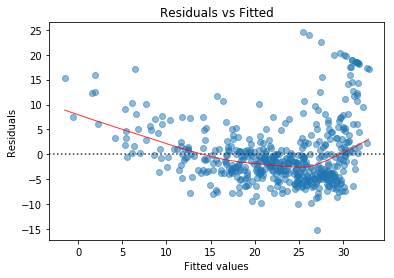

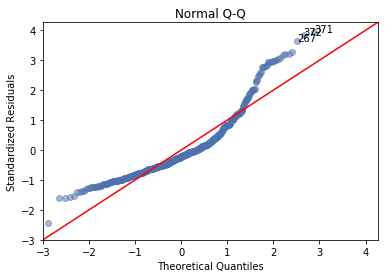

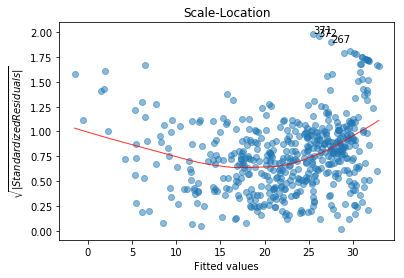

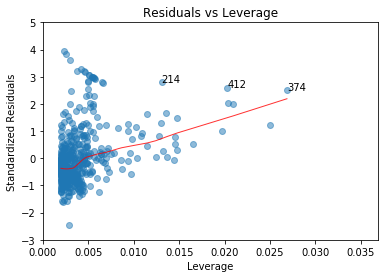

In [19]:
from statsmodels.graphics.gofplots import ProbPlot

x = pd.DataFrame(X)
y = pd.DataFrame(Y)
dataframe = pd.concat([x, y], axis=1)

#function for creating diagnostic plots of data
def diagnostic_plots(model_fit,dataframe):
    #Source: https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/
    #Residuals vs Fitted
    model_fitted_y = model_fit.fittedvalues
    model_residuals = model_fit.resid
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model_fit.get_influence().hat_matrix_diag
    model_cooks = model_fit.get_influence().cooks_distance[0]

    plot_lm_1 = plt.figure()
    plot_lm_1.axes[0] = sns.residplot(model_fitted_y, dataframe.columns[-1], data=dataframe,
                              lowess=True,
                              scatter_kws={'alpha': 0.5},
                              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

    plot_lm_1.axes[0].set_title('Residuals vs Fitted')
    plot_lm_1.axes[0].set_xlabel('Fitted values')
    plot_lm_1.axes[0].set_ylabel('Residuals');
    #Normal Q-Q Plot
    QQ = ProbPlot(model_norm_residuals)
    plot_lm_2 = QQ.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plot_lm_2.axes[0].set_title('Normal Q-Q')
    plot_lm_2.axes[0].set_xlabel('Theoretical Quantiles')
    plot_lm_2.axes[0].set_ylabel('Standardized Residuals');
    
    abs_norm_resid = np.flip(np.argsort(np.abs(model_norm_residuals)), 0)
    abs_norm_resid_top_3 = abs_norm_resid[:3]
    for r, i in enumerate(abs_norm_resid_top_3):
        plot_lm_2.axes[0].annotate(i,
                                   xy=(np.flip(QQ.theoretical_quantiles, 0)[r],
                                       model_norm_residuals[i]));
    #Scale-Location
    plot_lm_3 = plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5);
    sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_3.axes[0].set_title('Scale-Location')
    plot_lm_3.axes[0].set_xlabel('Fitted values')
    plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$');

    abs_sq_norm_resid = np.flip(np.argsort(model_norm_residuals_abs_sqrt), 0)
    abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
    for i in abs_norm_resid_top_3:
        plot_lm_3.axes[0].annotate(i,
                                 xy=(model_fitted_y[i],
                                     model_norm_residuals_abs_sqrt[i]));
    #Residuals vs Leverage
    plot_lm_4 = plt.figure();
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5);
    sns.regplot(model_leverage, model_norm_residuals,
              scatter=False,
              ci=False,
              lowess=True,
              line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8});
    plot_lm_4.axes[0].set_xlim(0, max(model_leverage)+0.01)
    plot_lm_4.axes[0].set_ylim(-3, 5)
    plot_lm_4.axes[0].set_title('Residuals vs Leverage')
    plot_lm_4.axes[0].set_xlabel('Leverage')
    plot_lm_4.axes[0].set_ylabel('Standardized Residuals');

    # annotations
    leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]
    for i in leverage_top_3:
        plot_lm_4.axes[0].annotate(i,
                                 xy=(model_leverage[i],
                                     model_norm_residuals[i]));

diagnostic_plots(model_fit,dataframe)

In [55]:
#Multiple Linear Regression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf

print(boston.head())
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html
#for function below
mult_X = boston.iloc[:,1:-1]
del mult_X['age']
print(mult_X.head())

#fit multiple linear regression model using statsmodels
mult_X2 = sm.add_constant(mult_X)
model = sm.OLS(Y,mult_X2)
model_fit = model.fit()
print(model_fit.summary())


   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  
      crim    zn  indus  chas    nox     rm     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  4.9671    2  242     17.8   
3

In [56]:
model2 = smf.ols(formula="medv~lstat*crim+I(lstat ** 2.0)",data=boston)
model2_fit = model2.fit()
print(model2_fit.summary())

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
#for function below
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X3)
#X3 is just Age
model = linear_model.LinearRegression().fit(x_,Y)
print('intercept:', model.intercept_)
print('coefficients:', model.coef_)

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     242.4
Date:                Sat, 14 Sep 2019   Prob (F-statistic):          1.22e-115
Time:                        13:36:01   Log-Likelihood:                -1567.8
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     501   BIC:                             3167.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          43.5863      0.879     